In [1]:
# Importing necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

In [5]:
strt = pd.read_csv(r"D:\Data science\Assignments docs\Neural Networks\50_Startups.csv")
strt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
strt.shape

(50, 5)

In [7]:
strt.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
strt.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
strt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Exploratory data analysis

In [10]:
# Checking the missing values in the dataset

In [11]:
strt.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### There are no NA values in the dataset

### Univariate analysis

In [12]:
# PLotting the histograms

In [13]:
strt.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

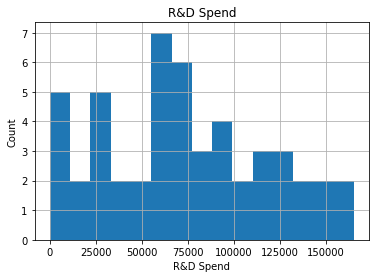

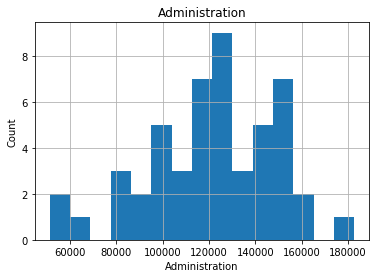

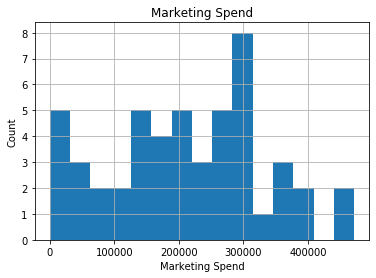

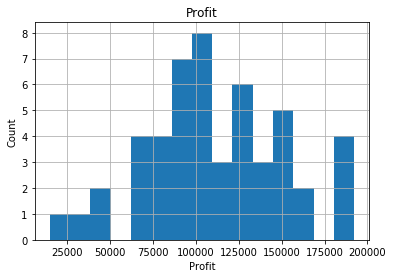

In [35]:
for feature in strt.columns:
    if feature != "State":
        data = strt.copy()
        data[feature].hist(bins=15)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

#### Most of the features are normally distributed

In [29]:
# PLotting boxplots

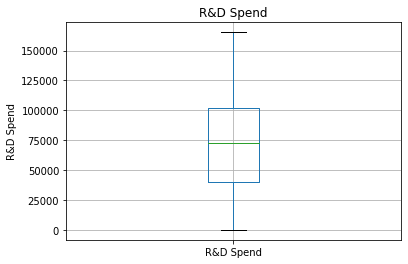

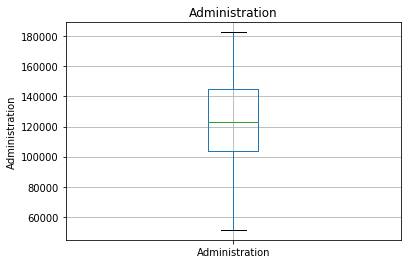

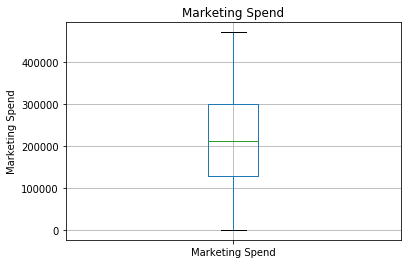

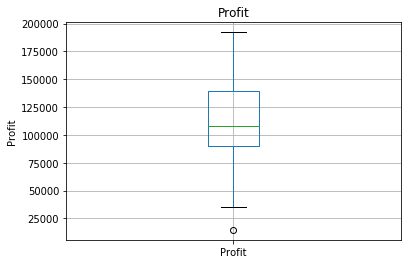

In [33]:
for feature in strt.columns:
    if feature != "State":
        data = strt.copy()
        strt.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### There are no outliers in the features

In [40]:
# Count plot for state

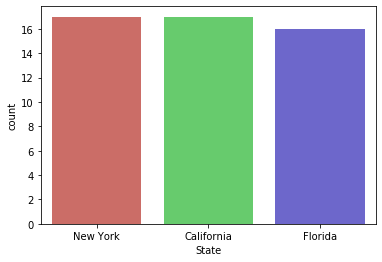

In [41]:
sns.countplot("State", data=strt, palette ="hls")

#### Counts of all the three states is almost equal in the dataset

### Bivariate analysis

In [ ]:
# Scatter plots of input feature with output feature

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


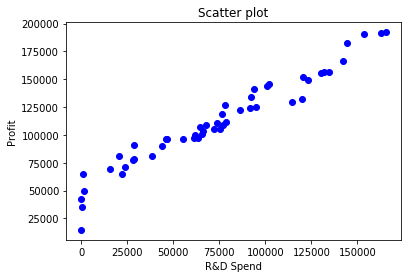

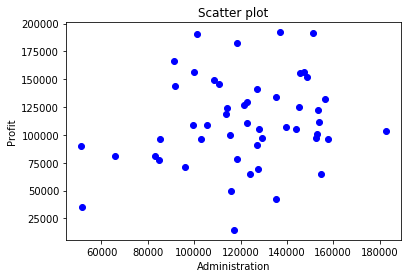

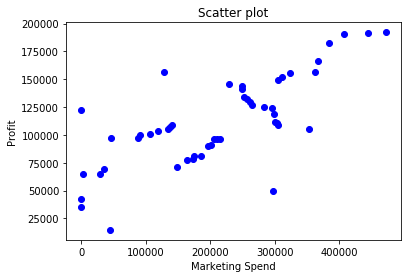

In [39]:
for feature in strt.columns:
    if feature != "State":
        if feature != "Profit":
            data = strt.copy()
            plt.plot(data[feature], data['Profit'], "bo")
            plt.xlabel(feature)
            plt.ylabel('Profit')
            plt.title("Scatter plot")
            plt.show()

#### R&D spend has good correlation with the output variable and other variables have lesser variation

In [42]:
# Plotting categorical value states with output variable profit

Text(0, 0.5, 'Profit')

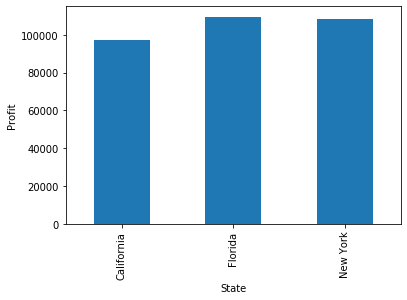

In [43]:
strt.groupby('State')['Profit'].median().plot.bar(); plt.xlabel('State'); plt.ylabel('Profit')

#### There is hardly any change in the output variable for three different states

### Correlation matrix

In [44]:
strt.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#### Input variables R&D Spend and Marketing spend have high correlation of around 72%

### Converting output variable "Profit" from continuos variable to categorical variable

In [47]:
strt["Profit"].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

#### Converting the Profit into two categories "High" and "Low"
#### Value for "High" will be > 140000

In [48]:
profit = pd.cut(strt.Profit, bins=[10000,140000,200000], labels = ["Low", "High"])

In [50]:
strt = strt.drop(["Profit"], axis=1)

In [51]:
# Adding categorized profit variable

In [52]:
strt["Profit"] = profit

In [53]:
strt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,High
1,162597.70,151377.59,443898.53,California,High
2,153441.51,101145.55,407934.54,Florida,High
3,144372.41,118671.85,383199.62,New York,High
4,142107.34,91391.77,366168.42,Florida,High


In [55]:
# Checking the value counts

In [54]:
strt.Profit.value_counts()

Low     37
High    13
Name: Profit, dtype: int64

In [56]:
# Encoding the "State" variable

In [57]:
states = pd.get_dummies(strt["State"], drop_first=True)

In [60]:
strt = pd.concat([strt, states], axis=1)

In [63]:
strt = strt.drop("State", axis=1)

In [64]:
strt.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,High,0,1
1,162597.70,151377.59,443898.53,High,0,0
2,153441.51,101145.55,407934.54,High,1,0
3,144372.41,118671.85,383199.62,High,0,1
4,142107.34,91391.77,366168.42,High,1,0


In [72]:
# Splitting the data into input and output variables

In [65]:
X = strt.drop(columns=["Profit"],axis=1)
Y = strt["Profit"]

In [66]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [67]:
Y.head()

0    High
1    High
2    High
3    High
4    High
Name: Profit, dtype: category
Categories (2, object): ['Low' < 'High']

In [71]:
# Spliting the data into train and test

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Feature scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
Scaler = StandardScaler()

In [75]:
Scaler.fit(x_train)

StandardScaler()

In [76]:
x_train = Scaler.transform(x_train)
x_test= Scaler.transform(x_test)

## Model building

In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30))

In [80]:
mlp.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(50, 30))

In [81]:
# predicting the values

In [82]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [84]:
# Confusion matrix

In [85]:
confusion_matrix(y_train, pred_train)

array([[ 8,  0],
       [ 0, 32]], dtype=int64)

In [86]:
confusion_matrix(y_test, pred_test)

array([[4, 1],
       [0, 5]], dtype=int64)

In [87]:
# Checking the accuracy

In [88]:
accuracy_score(y_train, pred_train)

1.0

In [89]:
accuracy_score(y_test, pred_test)

0.9

#### Accuracy obtained is good, but still tuning hyper parameter and checking the accuracy

## Hyper parameter tuning

In [100]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30),activation="logistic")

In [101]:
mlp.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30))

In [102]:
# predicting the values

In [103]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

In [104]:
# Confusion matrix

In [105]:
confusion_matrix(y_train, pred_train)

array([[ 3,  5],
       [ 0, 32]], dtype=int64)

In [106]:
confusion_matrix(y_test, pred_test)

array([[3, 2],
       [0, 5]], dtype=int64)

In [107]:
# Checking the accuracy

In [108]:
accuracy_score(y_train, pred_train)

0.875

In [109]:
accuracy_score(y_test, pred_test)

0.8

#### There is no improvement in the accuracy with this activation method

In [180]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500,activation="identity")

In [181]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(50, 30), max_iter=500)

In [182]:
# predicting the values

In [183]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

In [184]:
# Confusion matrix

In [185]:
confusion_matrix(y_train, pred_train)

array([[ 7,  1],
       [ 0, 32]], dtype=int64)

In [186]:
confusion_matrix(y_test, pred_test)

array([[4, 1],
       [0, 5]], dtype=int64)

In [187]:
# Checking the accuracy

In [188]:
accuracy_score(y_train, pred_train)

0.975

In [189]:
accuracy_score(y_test, pred_test)

0.9

#### The accuracy is not improving beyond 90%, which is good for a smaller dataset like this.
#### The default parameter model with two hidden layer of 50 and 30 neurons is giving highest accuracy of 90%